# Domácí úkol
## Část 1. Číselná spirála

Vytvořte čtvercovou matici o lichém počtu řádků a sloupců, která bude obsahovat čísla od 1 do $n^2$ tak, aby 1 byla uprostřed matice a číselná řada postupně narůstala po spirále proti směru hodinových ručiček.
- udělejte to pomocí NumPy přiřazování sliců do pole
- výstup musí být stejný jako primitivní funkce `integer_spiral` níže
- vyplňujte matici po "krůzích" okolo středu 
  - každý kruh je tvořen 4 částmi (hrana bez jednoho rohu)
  - využijte možnosti přiřazování sliců do pole a indexace s krokem -1
  - použijte `np.arange` pro vytvoření řady čísel kterou budete ukládat do hrany
- také si pomožte okrajem z 0, který nakonec oříznete

**Výsledná funkce bude mít tedy pouze jednu smyčku ve které do pole vstoupíme pouze 4x (jednou za každou hranu).** 

**Na závěr porovnejte rychlost vaší funkce s `integer_spiral` níže pomocí `%timeit` a různých výsledných velikostí matic (např. 101, 1001, 10001).**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# naplnění matice spirálou čísel
def integer_spiral(n):
    # abychom nemuseli řešit okraj = kontrolovat jestli jsme mimo matici
    # vytvoříme matici o velikosti n+2 x n+2
    # a vyplníme pouze středovou část
    A = np.zeros((n + 2, n + 2))

    pos_row = n//2 + 1  # počáteční pozice: střed matice
    pos_col = n//2 + 1

    i = 1  # číslo, které se bude vkládat do matice

    A[pos_row, pos_col] = i  # vložíme číslo do středu matice
    i += 1
    pos_col += 1  # posuneme se na první volné místo

    while i <= n**2:  # dokud nejsme na konci matice
        A[pos_row, pos_col] = i  # vložíme číslo na aktuální pozici
        i += 1  # zvýšíme číslo, které se má vložit
        if A[pos_row - 1, pos_col] != 0 and A[pos_row, pos_col + 1] == 0:
            pos_col += 1  # posuneme se doprava
        elif A[pos_row, pos_col - 1] != 0:
            pos_row -= 1  # posuneme se nahoru
        elif A[pos_row + 1, pos_col] != 0:
            pos_col -= 1  # posuneme se doleva
        else:
            pos_row += 1  # posuneme se dolů

    return A[1:-1, 1:-1]  # ořízneme nulový okraj


In [3]:
A = integer_spiral(7)
print(A)

[[37. 36. 35. 34. 33. 32. 31.]
 [38. 17. 16. 15. 14. 13. 30.]
 [39. 18.  5.  4.  3. 12. 29.]
 [40. 19.  6.  1.  2. 11. 28.]
 [41. 20.  7.  8.  9. 10. 27.]
 [42. 21. 22. 23. 24. 25. 26.]
 [43. 44. 45. 46. 47. 48. 49.]]


In [139]:
def integer_spiral_numpy(n):
    B = np.zeros((n + 2, n + 2))
    pos = n // 2 + 1
    B[pos, pos] = 1
    circles = n // 2
    a = 2
    i = 1
    i += 1    
    
    for i in range(1, circles + 1):
        L = 2 * i

        right = np.arange(a + L - 1, a - 1, -1)
        up = np.arange(a + 2 * L - 1, a + L -1, -1)
        left = np.arange(a + 2 * L, a + 3 * L)
        down = np.arange(a + 3 * L, a + 4 * L)
        
        B[pos - i : pos + i , pos + i] = right
        B[pos - i, pos - i : pos + i] =  up
        B[pos - i + 1 : pos + i + 1, pos - i] = left
        B[pos + i, pos - i + 1 : pos + i + 1] = down
        
    a += 8 * i
       
    return B[1:-1, 1:-1]

In [140]:
A = integer_spiral (7)
B = integer_spiral_numpy (7)
print("spiral:")
print(A)
print("numpy spiral:")
print(B)


spiral:
[[37. 36. 35. 34. 33. 32. 31.]
 [38. 17. 16. 15. 14. 13. 30.]
 [39. 18.  5.  4.  3. 12. 29.]
 [40. 19.  6.  1.  2. 11. 28.]
 [41. 20.  7.  8.  9. 10. 27.]
 [42. 21. 22. 23. 24. 25. 26.]
 [43. 44. 45. 46. 47. 48. 49.]]
numpy spiral:
[[13. 12. 11. 10.  9.  8.  7.]
 [14.  9.  8.  7.  6.  5.  6.]
 [15. 10.  5.  4.  3.  4.  5.]
 [16. 11.  6.  1.  2.  3.  4.]
 [17. 12.  7.  8.  9.  2.  3.]
 [18. 13. 14. 15. 16. 17.  2.]
 [19. 20. 21. 22. 23. 24. 25.]]


In [169]:
print("n = 111")
%timeit integer_spiral (111)
%timeit integer_spiral (111)

print("n = 999")
%timeit integer_spiral (999)
%timeit integer_spiral_numpy (999)

print("n = 1998")
%timeit integer_spiral (1998)
%timeit integer_spiral_numpy (1998)



n = 111
81.7 ms ± 9.95 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
76.8 ms ± 11.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
n = 999
7.33 s ± 262 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
188 ms ± 13.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
n = 1998
26.6 s ± 3.66 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
455 ms ± 48.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Část 2. Mandelbrotova množina
Vizualizujte Mandelbrotovu množinu na intervalu $[-2, 1] \times [-1.5, 1.5]$ pomocí `imshow`. Výsledek by měl vypadat jako následující obrázek.
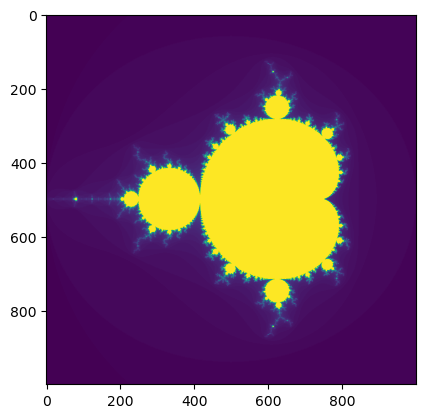

**Co je Mandelbrotova množina?**

Mandelbrotova množina je množina komplexních čísel $c$, pro které platí, že posloupnost $z_{i+1} = z_i^2 + c$ s $z_0 = 0$ konverguje (tj. $|z_i| < \infty$ pro všechna $n$).

**Co tedy udělat?**
- vytvořte matici $n\times n$ komplexních čísel $c$ na intervalu $[-2, 1] \times [-1.5, 1.5]$ (pomocí `np.mgrid` nebo `np.meshgrid`)
    - využite výhody vektorizace a toho, že numpy umí násobit komplexní čísla
- stanovit si počet iterací $k$, pro které budete testovat, zda posloupnost nedivergovala
    - to, že posloupnost diverguje, umíme pozorovat tak, že $|z_n| > 2$ pro nějaké $n$
- udělat $k$ iterací posloupnosti $z_{i+1} = z_i^2 + c$ a zjistit, kolikáté iteraci $k$ je se stalo, že $|z_i| < 2$
    - použijte pomocnou matici `divergence_matrix`, která bude mít stejný rozměr jako `c` a bude obsahovat počet iterací, kdy $|z_i| < 2$ pro každé $c$
- vytvořte obrázek pomocí `imshow` z `divergence_matrix`

In [141]:
def mandelbrot_set(x_min = -2, x_max = 1, y_min = -1.5, y_max = 1.5, n = 1000, k = 100):
    x, y = np.linspace(x_min, x_max, n), np.linspace(y_min, y_max, n)
    X, Y = np.meshgrid(x, y)
    
    c = X + 1j * Y
    Z = np.zeros_like(c)
    divergence_matrix = np.zeros_like(Z, dtype=int)

    for i in range (k):
        Zi = np.abs(Z) < 2
        Z[Zi] = Z[Zi]**2 + c[Zi]
        divergence_matrix[Zi] = i

    return divergence_matrix

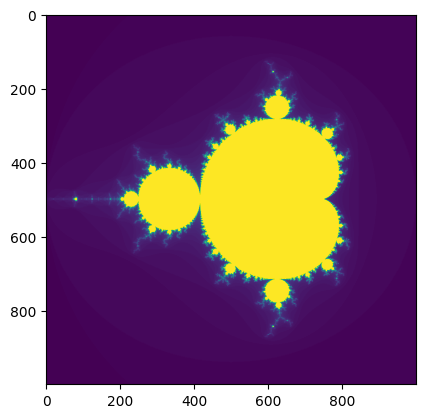

In [142]:
n = 1000
k = 100

divergence_matrix = mandelbrot_set(n=n, k=k)
plt.imshow(divergence_matrix)

# Bonus
1. Vykreslete také Juliovu množinu (viz. https://en.wikipedia.org/wiki/Julia_set)
2. Použijte váš kód pro číselnou spirálu a vytvořte obrázek prvočíselné spirály (viz. https://en.wikipedia.org/wiki/Ulam_spiral). Stačí vytvořit matici kde 

In [143]:
def Julia_set(c, x_min = -2, x_max = 1, y_min = -1.5, y_max = 1.5, n = 1000, k = 100):
    x, y = np.linspace(x_min, x_max, n), np.linspace(y_min, y_max, n)
    X, Y = np.meshgrid(x, y)

    Z = X + 1j * Y

    divergence_matrix = np.zeros_like(Z, dtype=int)

    for i in range(k):
        Zi = np.abs(Z) < 2
        Z[Zi] = Z[Zi]**2 + c
        divergence_matrix[Zi] = i

    return divergence_matrix


    

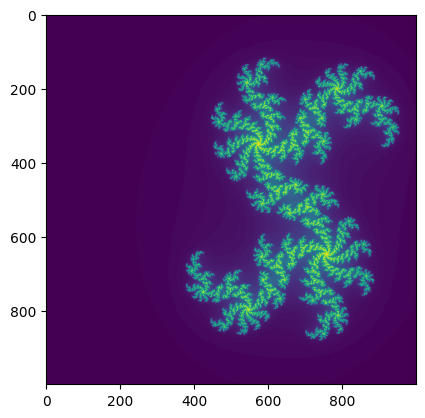

In [153]:
c = 0.4 + 0.2j
n = 1000
k = 100

divergence_matrix = Julia_set(c, n=n, k=k)
plt.imshow(divergence_matrix)

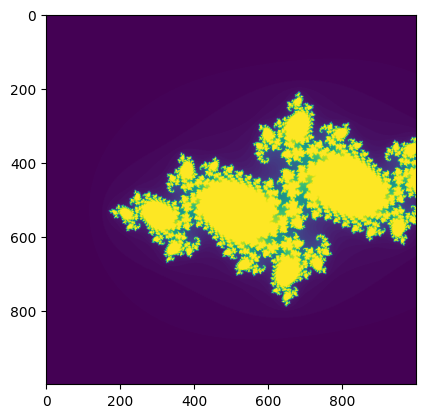

In [161]:
c = -0.7269 + 0.1889j
divergence_matrix = Julia_set(c, n=n, k=k)
plt.imshow(divergence_matrix)

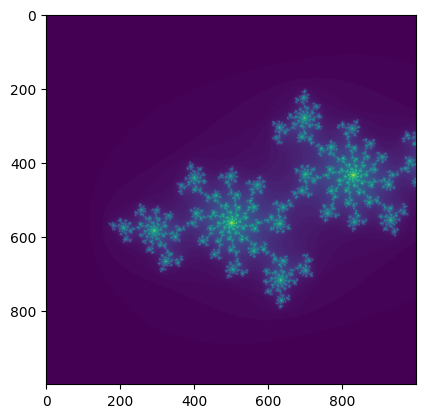

In [162]:
c = -0.70176 + 0.3842j
divergence_matrix = Julia_set(c, n=n, k=k)
plt.imshow(divergence_matrix)

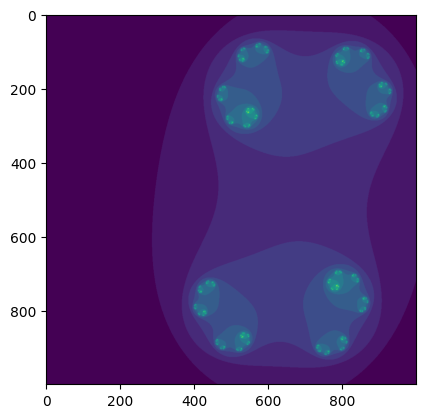

In [168]:
c = 0.727 + 0.1998j
divergence_matrix = Julia_set(c, n=n, k=k)
plt.imshow(divergence_matrix)